**Downloading Tensorflow version 2.10.1**

In [1]:
# Install TensorFlow 2.10.1
!pip install tensorflow==2.10.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 85.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 77.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 40.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  At

**Import necessary libraries**

In [2]:
import tensorflow as tf
print(f"Tensorflow version: {tf.__version__}")
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping ,ModelCheckpoint
import pandas as pd
import numpy as np
import os
import pathlib
import matplotlib.pyplot as plt
import shutil
# # Change directory
# cascade_path = pathlib.Path(__file__).parent.absolute()
# print(f"cascade_path: {cascade_path}")
# os.chdir(cascade_path)

Tensorflow version: 2.10.1


**Mount Google Drive in Google Colab to access files stored in Google Drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Installing kaggle and Fer2013 dataset**

In [4]:
!pip install kaggle

**Check if the kaggle.json file is present in the /content directory**

In [5]:
# To access the fer2013 dataset, follow these steps:
# 1. Obtain your 'kaggle.json' file by visiting 'https://www.kaggle.com/settings>َAPI>Create new token'.
# 2. Create a new token to generate the 'kaggle.json' file.
# 3. Use this 'kaggle.json' file to access to Fer2013 dataset.

if not os.path.exists('/content/kaggle.json'):
    print("Please upload the kaggle.json file to the /content directory.")
    from google.colab import files
    files.upload()
else:
    print("Already uploaded.")

Please upload the kaggle.json file to the /content directory.


Saving kaggle.json to kaggle.json


**Downloading fer2013 dataset from Kaggle using kaggle API**

In [6]:
# Make sure the .kaggle directory exists in the /content directory
!mkdir -p /content/kaggle
# Copy the kaggle.json file to the .kaggle directory
!cp /content/kaggle.json /content/kaggle/kaggle.json
# List the files in the /content/kaggle directory to verify the copy
!ls /content/kaggle
# List the files in the /content/datasets directory to check if the datasets folder exists
!ls /content/datasets
# Set appropriate permissions for the kaggle.json file
!chmod 600 /content/kaggle/kaggle.json
# Set the KAGGLE_CONFIG_DIR environment variable to /content/kaggle
os.environ['KAGGLE_CONFIG_DIR'] = '/content/kaggle'
# Verify the content of the .kaggle directory
!ls /content/kaggle
# Now you can use the Kaggle API without authentication issues
!kaggle datasets list
# Check if the fer2013 file is present in the /content/datasets directory
if not os.path.exists('/content/datasets/fer2013.csv'):
    # Make sure the datasets directory exists in the /content directory
    !mkdir -p /content/datasets
    # Download the desired Kaggle dataset to the /content/datasets directory
    !kaggle datasets download -d deadskull7/fer2013 -p /content/datasets/
    # Unzip the downloaded dataset
    !unzip /content/datasets/fer2013.zip -d /content/datasets
    # List the files in the /content/datasets directory to verify the download
    !ls /content/datasets

kaggle.json
ls: cannot access '/content/datasets': No such file or directory
kaggle.json
ref                                                          title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
muhammadroshaanriaz/students-performance-dataset-cleaned     Students Performance | Clean Dataset                10KB  2024-10-29 19:32:26           5073         93  1.0              
valakhorasani/mobile-device-usage-and-user-behavior-dataset  Mobile Device Usage and User Behavior Dataset       11KB  2024-09-28 20:21:12          26376        520  1.0              
ironwolf437/laptop-price-dataset                             Laptop Price - dataset‏                             25KB  2024-11-12 15:50:44           1165         28  1.0      

**Loading the dataset**

In [7]:
# Preprocess the dataset
df = pd.read_csv('/content/datasets/fer2013.csv')
# df = pd.read_csv('fer2013.csv')

# Printing columns of the dataset
columns = df.columns
print(f"columns of the dataset: {columns}")

# Split the dataset into train and test sets
train_data = df.loc[df['Usage'] == 'Training']
test_data = df.loc[df['Usage'] == 'PrivateTest']

# Get the training images
x_train = np.array(list(map(str.split, train_data['pixels']))).astype(float)
# Get the training labels
y_train = train_data['emotion'].values

# Get the test images
x_test = np.array(list(map(str.split, test_data['pixels']))).astype(float)
# Get the test labels
y_test = test_data['emotion'].values

num_classes = 7

# Reshape the training and test images
x_train = x_train.reshape(x_train.shape[0], 48, 48, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1).astype('float32')

# Normalize the training and test images
x_train /= 255.0
x_test /= 255.0

# Convert the training and test labels to categorical variables
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

columns of the dataset: Index(['emotion', 'pixels', 'Usage'], dtype='object')


**Define data augmentation**

In [8]:
# Define data augmentation
data_augmentation = ImageDataGenerator(
    # rotation_range=7,
    # width_shift_range=0.1,
    # height_shift_range=0.1,
    horizontal_flip=True,
    # vertical_flip=True,
)

**Defining the model**

In [9]:
# Define the model
model = Sequential([
    Input(shape=(48, 48, 1)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Flatten(),
    BatchNormalization(),
    Dense(16, activation='relu'),
    Dropout(0.1),
    Dense(8, activation='relu'),
    # Dropout(0.2),
    Dense(7, activation='softmax')
])

# Compile the model
initial_learning_rate = 0.001
opt = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)

# # Define the learning rate scheduler
# def scheduler(epoch, learning_rate):
#     if epoch < 8:
#         return learning_rate
#     elif 7<epoch<50:
#         return learning_rate * tf.math.exp(-0.001)
#     elif epoch>49:
#         return learning_rate * tf.math.exp(-0.01)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

**Fitting the model**

In [10]:
# Fit the model
batch_size = 64
epochs = 20
# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

# Define the early stopping and model checkpoint callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# Save the best model
model_checkpoint = ModelCheckpoint('/content/best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

history = model.fit(
    data_augmentation.flow(x_train, y_train, batch_size=batch_size),
    # x_train, y_train,
    # batch_size=batch_size,
    # steps_per_epoch=len(x_train) / batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test),
    callbacks=[ early_stop, model_checkpoint] #lr_scheduler,
)

Epoch 1/20
449/449 [==============================] - ETA: 0s - loss: 1.7481 - accuracy: 0.2867
Epoch 1: val_loss improved from inf to 1.70387, saving model to /content/best_model.h5
449/449 [==============================] - 285s 632ms/step - loss: 1.7481 - accuracy: 0.2867 - val_loss: 1.7039 - val_accuracy: 0.3555
Epoch 2/20
449/449 [==============================] - ETA: 0s - loss: 1.5235 - accuracy: 0.4089
Epoch 2: val_loss improved from 1.70387 to 1.68105, saving model to /content/best_model.h5
449/449 [==============================] - 284s 633ms/step - loss: 1.5235 - accuracy: 0.4089 - val_loss: 1.6810 - val_accuracy: 0.3561
Epoch 3/20
449/449 [==============================] - ETA: 0s - loss: 1.3907 - accuracy: 0.4733
Epoch 3: val_loss improved from 1.68105 to 1.41730, saving model to /content/best_model.h5
449/449 [==============================] - 285s 635ms/step - loss: 1.3907 - accuracy: 0.4733 - val_loss: 1.4173 - val_accuracy: 0.4464
Epoch 4/20
449/449 [==================

**Saving the model with the latest accuracy obtained**

In [11]:
filename = 'emotion_detection_model.h5'
filepath = '/content/' + filename
model.save(filepath)
# model.save('emotion_detection_model.h5')

**Plot the training and validation loss and accuracy values over the epochs**

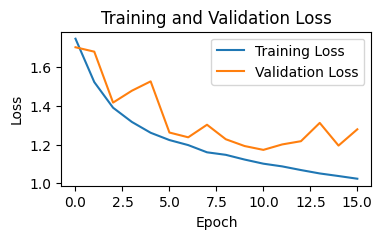

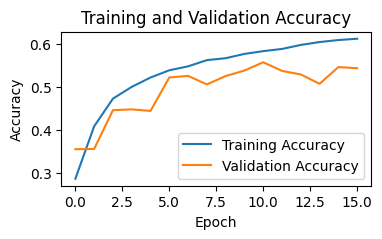

In [12]:
# Plot training and validation loss
plt.figure(figsize=(4, 2))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(4, 2))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

113/113 [==============================] - 10s 88ms/step


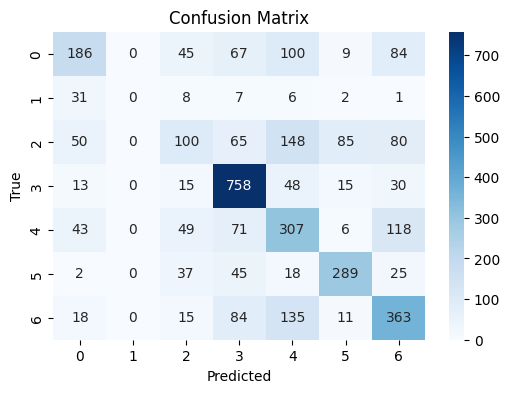

In [13]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

# Get predictions on the test set
y_pred = model.predict(x_test)

# Convert predictions from one-hot encoding to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert y_test from one-hot encoding to class labels
y_true_classes = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(0, 7), yticklabels=np.arange(0, 7))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [19]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Get predictions on the test set
y_pred = model.predict(x_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


113/113 [==============================] - 10s 92ms/step
Mean Squared Error (MSE): 3.7492
Root Mean Squared Error (RMSE): 1.9363


In [24]:
filename = 'best_model.h5'
filepath = '/content/' + filename
model.save(filepath)

# If you want to download the file in a Google Colab environment
from google.colab import files
files.download(filepath)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>